In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

#for get dataset from sklearn
from sklearn.datasets import load_iris
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score, recall_score, f1_score

In [2]:
iris = load_iris()


In [3]:
iris.keys()



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
#x=pd.DataFrame(np.concatenate((iris['data'],iris["target"].reshape(-1,1)) ,axis=1),colums=)
iris['feature_names']+['target']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [5]:
df=pd.DataFrame(np.concatenate((iris['data'],iris["target"].reshape(-1,1)) ,axis=1)
               ,columns=iris['feature_names']+['targrt'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targrt
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
df['targrt'].unique()

array([0., 1., 2.])

In [7]:
df= utils.shuffle(df,random_state=42)

In [8]:
X=df.drop(columns=['targrt'] ,axis=1)
y=df['targrt']

## Standardized feature=  X−mean(X)/std(X)

In [9]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [10]:
X_scaled

array([[ 3.10997534e-01, -5.92373012e-01,  5.35408562e-01,
         8.77547895e-04],
       [-1.73673948e-01,  1.70959465e+00, -1.16971425e+00,
        -1.18381211e+00],
       [ 2.24968346e+00, -1.05276654e+00,  1.78583195e+00,
         1.44883158e+00],
       [ 1.89829664e-01, -3.62176246e-01,  4.21733708e-01,
         3.95774101e-01],
       [ 1.15917263e+00, -5.92373012e-01,  5.92245988e-01,
         2.64141916e-01],
       [-5.37177559e-01,  7.88807586e-01, -1.28338910e+00,
        -1.05217993e+00],
       [-2.94841818e-01, -3.62176246e-01, -8.98031345e-02,
         1.32509732e-01],
       [ 1.28034050e+00,  9.82172869e-02,  7.62758269e-01,
         1.44883158e+00],
       [ 4.32165405e-01, -1.97355361e+00,  4.21733708e-01,
         3.95774101e-01],
       [-5.25060772e-02, -8.22569778e-01,  8.07091462e-02,
         8.77547895e-04],
       [ 7.95669016e-01,  3.28414053e-01,  7.62758269e-01,
         1.05393502e+00],
       [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
      

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


In [12]:
knn_clf =KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn_clf.fit(X_train , y_train)

KNeighborsClassifier()

In [13]:
knn_clf.classes_


array([0., 1., 2.])

In [14]:
y_pred = knn_clf.predict(X_test)

In [15]:
input_data = np.array([[2.1,3.5,1.4,0.2]])

# Make the prediction
z= knn_clf.predict(input_data)

In [16]:
z

array([2.])

In [17]:
data=pd.DataFrame(np.column_stack((y_test, y_pred)),columns=['Truth' ,'predicited'])

In [18]:
data

,Truth,predicited
0,0.0,0.0
1,1.0,2.0
2,1.0,1.0
3,1.0,1.0
4,2.0,2.0
5,0.0,0.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [26]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [27]:
len(data[data['Truth']==data['predicited']])/len(data['Truth'])


0.9333333333333333

### Confusion Matrix:
### [[true_negative  false_positive]
### [false_negative true_positive]]


In [21]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  6]], dtype=int64)

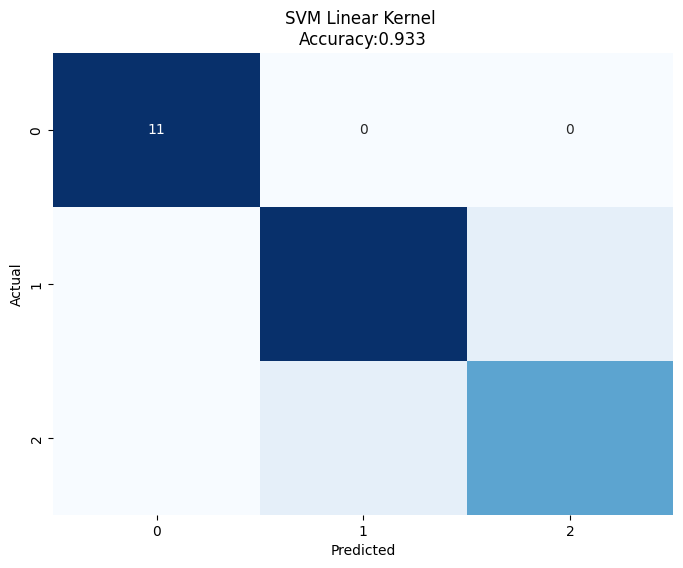

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.show()

In [23]:
# Precision
precision_micro = precision_score(y_test, y_pred, average='micro')
print(f'Precision (Micro): {precision_micro:.4f}')

Precision (Micro): 0.9333


In [24]:
recall_macro = recall_score(y_test, y_pred, average='macro')
print(f'Recall (Macro): {recall_macro:.4f}')

Recall (Macro): 0.9246
